In [1]:
#%%
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, losses

print(tf.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2.0.0


In [2]:
# 在线下载汽车效能数据集
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
# 效能（公里数每加仑），气缸数，排量，马力，重量
# 加速度，型号年份，产地
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
# 查看部分数据
dataset.tail()

#%%

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
# 统计空白数据,并清除
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [11]:
# 处理类别型数据，其中origin列代表了类别1,2,3,分布代表产地：美国、欧洲、日本
# 其弹出这一列
origin = dataset.pop('Origin')

In [12]:
# 根据origin列来写入新列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [13]:
# 切分为训练集和测试集
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index) 

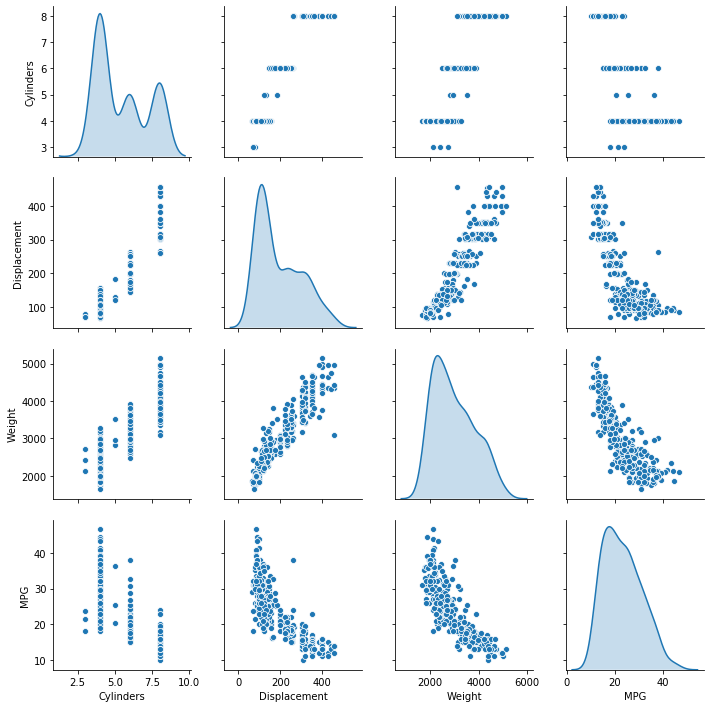

In [14]:
#%% 统计数据
sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight", "MPG"]], 
diag_kind="kde")

In [15]:
# 查看训练集的输入X的统计数据
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [16]:
# 移动MPG油耗效能这一列为真实标签Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [17]:
# 标准化数据
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [18]:
print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [19]:
class Network(keras.Model):
    # 回归网络
    def __init__(self):
        super(Network, self).__init__()
        # 创建3个全连接层
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)

    def call(self, inputs, training=None, mask=None):
        # 依次通过3个全连接层
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [20]:
model = Network()
model.build(input_shape=(None, 9))
model.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [21]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

In [24]:
# 未训练时测试
example_batch = normed_train_data.values[:10]
example_result = model.predict(example_batch)
example_result

array([[0.14704096],
       [0.31706887],
       [0.6333758 ],
       [0.3916751 ],
       [0.37168962],
       [0.5070391 ],
       [0.40355057],
       [0.43531898],
       [0.31656015],
       [0.59887195]], dtype=float32)

In [28]:
example_result.reshape(-1).shape

(10,)

In [27]:
train_labels[:10].shape

(10,)

In [30]:
tf.keras.losses.MAE(example_result.reshape(-1),train_labels[:10])

<tf.Tensor: id=169, shape=(), dtype=float32, numpy=25.747782>

In [32]:
train_mae_losses = []
test_mae_losses = []
for epoch in range(200):
    for step, (x,y) in enumerate(train_db):

        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(losses.MSE(y, out))
            mae_loss = tf.reduce_mean(losses.MAE(y, out)) 

        if step % 10 == 0:
            print(epoch, step, float(loss))

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_mae_losses.append(float(mae_loss))
    out = model(tf.constant(normed_test_data.values))
    test_mae_losses.append(tf.reduce_mean(losses.MAE(test_labels, out)))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 0 673.7443237304688
1 0 596.2351684570312
2 0 420.4908447265625
3 0 434.19549560546875
4 0 317.0391845703125
5 0 218.10040283203125
6 0 210.74685668945312
7 0 149.42063903808594
8 0 107.2421646118164
9 0 100.40562438964844
10 0 93.45838165283203
11 0 82.37071228027344
12 0 93.83238220214844
13 0 84.76586151123047
14 0 59.99433135986328
15 0 69.62882232666016
16 0 56.467506408691406
17 0 68.1185531616211
18 0 50.293540954589844
19 0 77.20209503173828
20 0 57.33329391479492
21 0 57.48345184326172
22 0 7

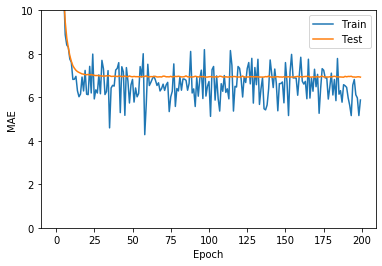

In [33]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(train_mae_losses,  label='Train')

plt.plot(test_mae_losses, label='Test')
plt.legend()
 
plt.ylim([0,10])
plt.legend()
# plt.savefig('auto.svg')
plt.show() 